# Kinetics with Metadynamics + Mean Force Integration

Case study pvc dimer betascission continue description 

1. **decomposition in vacuum**
        I) Mean Force Integration
        
            a) T = 300 K
            b) T = 325 K
            c) T = 350 K
            
        II) Minimum Free energy Pathway
        
        III) Validation of the Transition State through the histogram method
        
2. **decomposition in water solvent**

        I)
        II)
        III)
        
3. **decomposition in "bulk" (1,2-Dichloroethane)**

        I)
        II)
        III)
        

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import codecs
os.chdir("C:\Users\fserse\Desktop\PhD_Thesis\Kinetics from Metadynamics")
from pyMFI import MFI
#simdata_path = ("C:/Users/fserse/Desktop/PhD_Thesis/MFI/pvc_water/")

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\fserse\Desktop\PhD_Thesis\MFI


In [3]:
pckg_path = (r"C:\Users\fserse\Desktop\PhD_Thesis\Kinetics from Metadynamics\Libraries")

In [4]:

def metadyn2hills(sigma_x,sigma_y,gamma,hartree2_kj, nsim_start, nsim_end, path):

     for i in np.arange(nsim_start,nsim_end+1):
            
        with open(str(path)+"colvar_"+str(i)) as f:
             columns = [str(s.strip()).split() for s in f.readlines()]
        
        f.close()
        
        with open(str(path)+"position_"+str(i),'w') as f:
             for x in columns:
                    f.write("\t{0}\t\t{1}\t\t{2}\n".format(x[0],x[1],x[2]))
        
        f.close()
        
        k = 0
        with open(str(path)+"HILLS_"+str(i),'w') as f:
             for x in columns:
                    if k%9 == 0:
                        f.write("\t{0}\t{1}\t\t{2} "" {3} "" {4}\t\t{5}\t\t{6}\n".format(x[0],float(x[1]),float(x[2]),sigma_x,sigma_y, 0.00159*hartree_2_kj*0.5 ,gamma ))
                    k = k+1
        f.close()
      



In [5]:
#input constants
sigma_x = 0.2
sigma_y = 0.2
gamma = -1.0
hartree_2_kj = 627.509*4.18
Bohr2meters = 5.2918e-11

131.149381


# 1. Decomposition in vacuum

###    I) Mean Force Integration      

    a) T= 300 K 

First **HILLS** and **position** files are imported. For this temperature three **wall potentials** have been used in the region X = [3.5 5.0] because in vacuum conditions the metastable states (which can be found in that X region) is poorly sampled. In fact, when the splitting reaction happends inside a solvent, the cage effect allows a more extensive sampling of the metastable region which we are interested in.

# n-Butylacrylate

    I) Gas phase, T = 410 K
    II) Liquid phase, T = 410K

### 2) Gas phase: Free Energy Surface @410K with GNFN1 xTB

In [6]:
from pyMFI import MFI

#from pyMFI import MFI
fes_410K_gas_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/410K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [7]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 1, 9, fes_410K_gas_xtb_patch)

In [8]:
for simulation in np.arange(1,10):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_410K_gas_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_410K_gas_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.4, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=120, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 892


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/892|==> Average Mean Force Error: 19.49927860297843
|200/892|==> Average Mean Force Error: 21.985839216958826
|300/892|==> Average Mean Force Error: 23.536694941309847
|400/892|==> Average Mean Force Error: 25.898641169962445
|500/892|==> Average Mean Force Error: 28.11798730523459
|600/892|==> Average Mean Force Error: 30.34730032420483
|700/892|==> Average Mean Force Error: 34.9029598070303
|800/892|==> Average Mean Force Error: 37.25731915321219
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 873
|100/873|==> Average Mean Force Error: 17.878388259057107
|200/873|==> Average Mean Force Error: 22.179233063252745
|300/873|==> Average Mean Force Error: 24.685782049936527
|400/873|==> Average Mean Force Error: 26.728580270088866
|500/873|==> Average Mean Force Error: 28.84482748169307
|600/873|==> Average Mean Force Error: 31.041238143186774
|700/873|==> Average Mean Force Error: 34.9031310047546
|800/873|==> Average Mean Force Err

20 FES st. dev. = 4.37
40 FES st. dev. = 4.321
60 FES st. dev. = 4.414
80 FES st. dev. = 4.289
100 FES st. dev. = 4.257


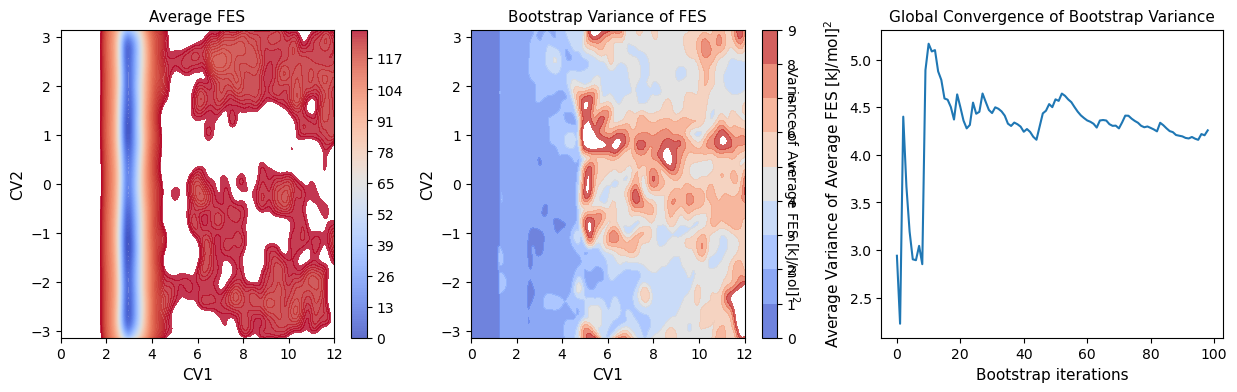

In [9]:
#from pyMFI import MFI

# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 130, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 130, ofe_lim = 10)

In [20]:
fes_410K_gas_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/410K/'

In [10]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_410K_gas_xtb_patch)+'std_gas410.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_410K_gas_xtb_patch)+'fesavg_gas410.json','w', encoding = 'utf-8'))

In [22]:
import json
import codecs

f = open(str(fes_410K_gas_xtb_patch)+'fesavg_gas410.json','r')
lista = json.load(f)

Z = lista

Z_matrix_gas = np.array(lista).reshape(200,200)

var = open(str(fes_410K_gas_xtb_patch)+'std_gas410.json','r')
variance = json.load(var)

Var_gas = np.array(variance).reshape(200,200)

### 1) Liquid phase: free energy surface @ 410 K with GNFN1 XTB

In [4]:
#from pyMFI import MFI
fes_410K_bulk_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/MON/410K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [8]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 8, 11, fes_410K_bulk_xtb_patch)

In [7]:
for simulation in np.arange(1,12):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_410K_bulk_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_410K_bulk_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.4, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=120, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 1166


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/1166|==> Average Mean Force Error: 19.125860529595403
|200/1166|==> Average Mean Force Error: 21.22303453030399


KeyboardInterrupt: 

20 FES st. dev. = 7.085
40 FES st. dev. = 6.436
60 FES st. dev. = 6.24
80 FES st. dev. = 6.424
100 FES st. dev. = 6.289


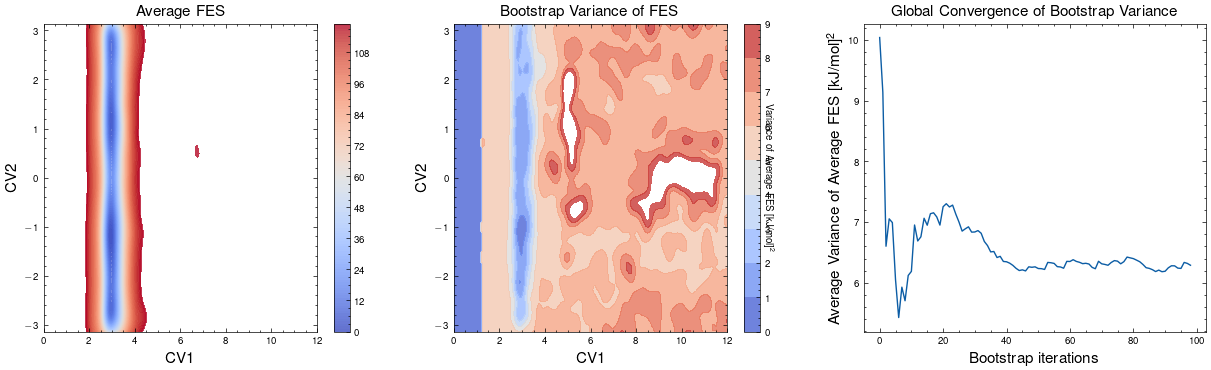

In [18]:
# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 130, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 130, ofe_lim = 10)

In [19]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_410K_bulk_xtb_patch)+'std_liq410.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_410K_bulk_xtb_patch)+'fesavg_liq410.json','w', encoding = 'utf-8'))

In [5]:
f = open('C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/MON/410K/fesavg_liq410.json','r')

Z_matrix_bulk = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_410K_bulk_xtb_patch)+'std_liq410.json','r')
variance = json.load(var)

Var_bulk = np.array(variance).reshape(200,200)

#### Xylene Solvent @ 410 K with GNFN1 XTB

In [13]:
#from pyMFI import MFI
fes_410K_xyl_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/XYL/410K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [40]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 1, 10, fes_410K_xyl_xtb_patch)

In [14]:
for simulation in np.arange(1,11):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_410K_xyl_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_410K_xyl_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.4, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=120, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 302
|100/302|==> Average Mean Force Error: 19.403051445477406
|200/302|==> Average Mean Force Error: 21.998123571009774
|300/302|==> Average Mean Force Error: 24.430274288759282
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 830
|100/830|==> Average Mean Force Error: 19.553766114817055
|200/830|==> Average Mean Force Error: 21.64437950944263
|300/830|==> Average Mean Force Error: 24.0807748986572
|400/830|==> Average Mean Force Error: 25.528044568197625
|500/830|==> Average Mean Force Error: 27.198862502935224
|600/830|==> Average Mean Force Error: 29.91332364574081
|700/830|==> Average Mean Force Error: 32.241048519158326
|800/830|==> Average Mean Force Error: 31.40779017241962
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 1225
|100/1225|==> Average Mean Force Error: 19.63238221714

20 FES st. dev. = 3.555
40 FES st. dev. = 3.648
60 FES st. dev. = 3.497
80 FES st. dev. = 3.434
100 FES st. dev. = 3.501


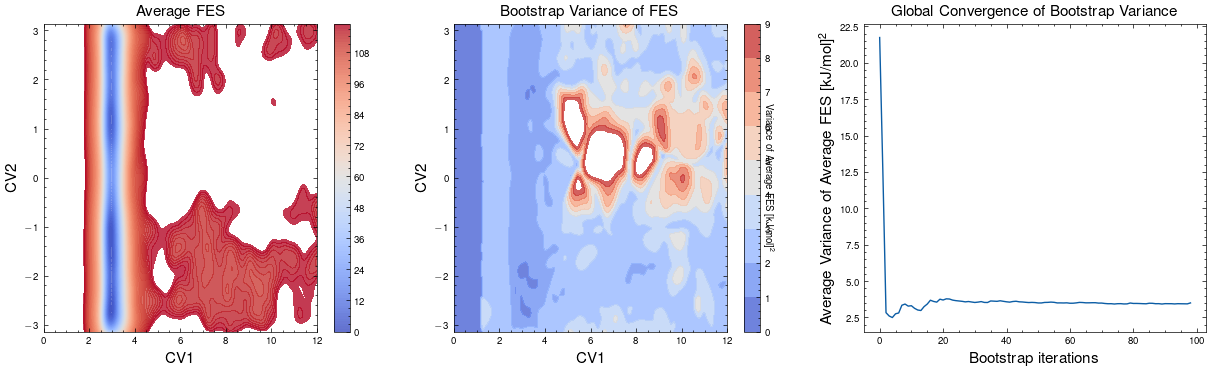

In [21]:
# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 120, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )


MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 120, ofe_lim = 10)
plt.savefig("free_energy_surf_xyl_410K.png", format="png", dpi=1200)

In [43]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_410K_xyl_xtb_patch)+'std_liq410.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_410K_xyl_xtb_patch)+'fesavg_liq410.json','w', encoding = 'utf-8'))

In [40]:
f = open('C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/XYL/410K/fesavg_liq410.json','r')

Z_matrix_xyl = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_410K_xyl_xtb_patch)+'std_liq410.json','r')
variance = json.load(var)

Var_xyl = np.array(variance).reshape(200,200)

## T = 400 K

### GAS phase

In [5]:
from pyMFI import MFI

#from pyMFI import MFI
fes_400K_gas_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/400K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [60]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 1, 10, fes_400K_gas_xtb_patch)

In [61]:
for simulation in np.arange(1,11):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_400K_gas_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_400K_gas_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.3, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=140, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 995


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning:

invalid value encountered in double_scalars



|100/995|==> Average Mean Force Error: 19.019055773767228
|200/995|==> Average Mean Force Error: 21.281860078252972
|300/995|==> Average Mean Force Error: 23.055622924544103
|400/995|==> Average Mean Force Error: 24.658965826210018
|500/995|==> Average Mean Force Error: 27.800636064692974
|600/995|==> Average Mean Force Error: 28.58643162249401
|700/995|==> Average Mean Force Error: 29.597376985003965
|800/995|==> Average Mean Force Error: 31.572411599193046
|900/995|==> Average Mean Force Error: 27.013717765586776
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 920
|100/920|==> Average Mean Force Error: 19.474533313919736
|200/920|==> Average Mean Force Error: 21.716130774225658
|300/920|==> Average Mean Force Error: 23.015659414667603
|400/920|==> Average Mean Force Error: 24.45883482925929
|500/920|==> Average Mean Force Error: 26.477419451844877
|600/920|==> Average Mean Force Error: 28.871686534010067
|700/920|==> Average Mean Fo

20 FES st. dev. = 5.264
40 FES st. dev. = 5.724
60 FES st. dev. = 5.601
80 FES st. dev. = 5.387
100 FES st. dev. = 5.425


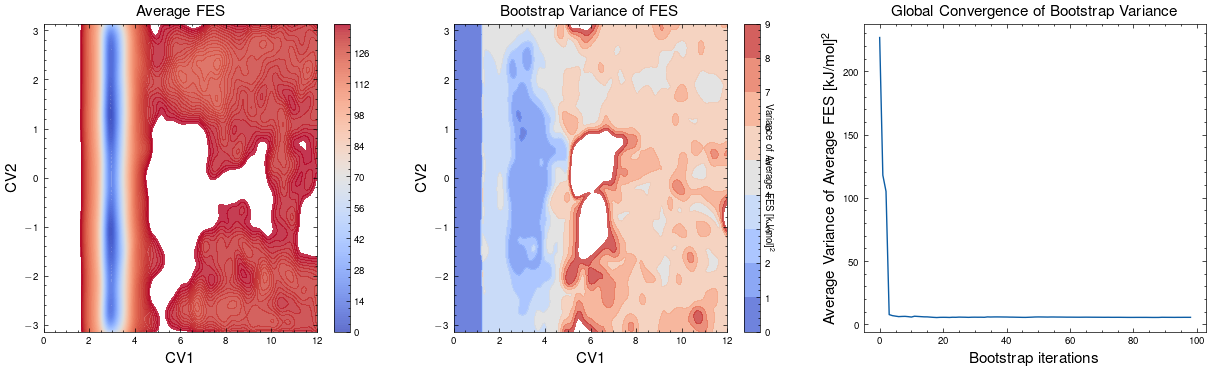

In [62]:
#from pyMFI import MFI

# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 140, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 140, ofe_lim = 10)

In [63]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_400K_gas_xtb_patch)+'std_gas400.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_400K_gas_xtb_patch)+'fesavg_gas400.json','w', encoding = 'utf-8'))

In [6]:
f = open('C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/400K/fesavg_gas400.json','r')

Z_matrix_gas_400 = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_400K_gas_xtb_patch)+'std_gas400.json','r')
variance = json.load(var)

Var_gas_400 = np.array(variance).reshape(200,200)

### BULK

### XYLENE

## T = 390 K

### GAS phase

In [2]:
from pyMFI import MFI

#from pyMFI import MFI
fes_390K_gas_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/390K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [69]:
#metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 1, 10, fes_390K_gas_xtb_patch)

In [77]:
for simulation in np.arange(1,11):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_390K_gas_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_390K_gas_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.2, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=140, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 800
|100/800|==> Average Mean Force Error: 16.570343714608114
|200/800|==> Average Mean Force Error: 21.372773739477427
|300/800|==> Average Mean Force Error: 23.09607827984895
|400/800|==> Average Mean Force Error: 24.125044286513177
|500/800|==> Average Mean Force Error: 25.489588664721484
|600/800|==> Average Mean Force Error: 27.470055155821406
|700/800|==> Average Mean Force Error: 29.72425933359663
|800/800|==> Average Mean Force Error: 26.600597775150426
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 528
|100/528|==> Average Mean Force Error: 15.555049070912169
|200/528|==> Average Mean Force Error: 20.03493864892754
|300/528|==> Average Mean Force Error: 21.807988518684528
|400/528|==> Average Mean Force Error: 24.894053799281636
|500/528|==> Average Mean Force Error: 26.10041654013108
I will integrate the FES every  100  steps

20 FES st. dev. = 6.5
40 FES st. dev. = 6.2
60 FES st. dev. = 6.089
80 FES st. dev. = 6.211
100 FES st. dev. = 6.14


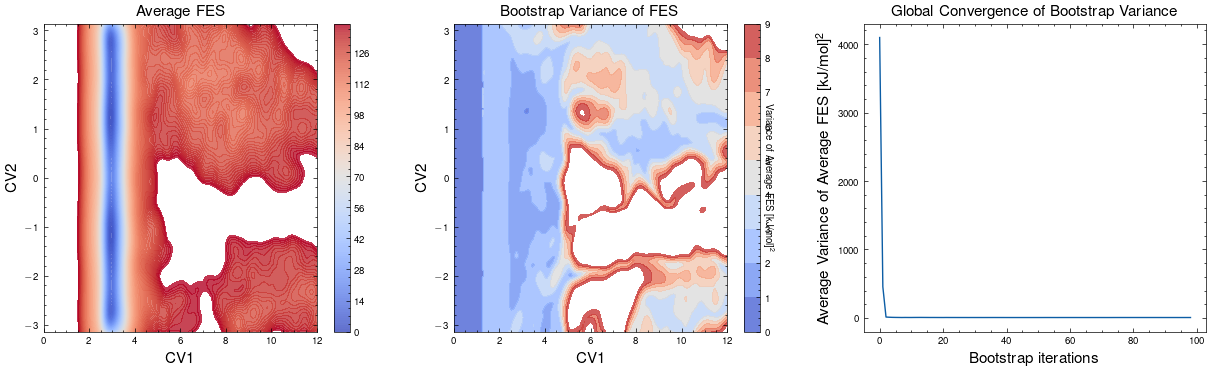

In [78]:
#from pyMFI import MFI

# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 140, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 140, ofe_lim = 10)

In [79]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_390K_gas_xtb_patch)+'std_gas390.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_390K_gas_xtb_patch)+'fesavg_gas390.json','w', encoding = 'utf-8'))

In [4]:
f = open('C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/GAS/390K/fesavg_gas390.json','r')

Z_matrix_gas_390 = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_390K_gas_xtb_patch)+'std_gas390.json','r')
variance = json.load(var)

Var_gas_390 = np.array(variance).reshape(200,200)

### BULK

### XYLENE

In [7]:
from pyMFI import MFI

fes_390K_xyl_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/XYL/390K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [9]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 1, 7, fes_390K_xyl_xtb_patch)

In [10]:
for simulation in np.arange(1,8):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_390K_xyl_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_390K_xyl_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.2, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=120, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 1114


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/1114|==> Average Mean Force Error: 19.605226289801504
|200/1114|==> Average Mean Force Error: 20.461349347339322
|300/1114|==> Average Mean Force Error: 22.631093002960704
|400/1114|==> Average Mean Force Error: 24.68972022454003
|500/1114|==> Average Mean Force Error: 26.746312781821302
|600/1114|==> Average Mean Force Error: 29.229960309399
|700/1114|==> Average Mean Force Error: 30.667355467162782
|800/1114|==> Average Mean Force Error: 28.12450180066039
|900/1114|==> Average Mean Force Error: 25.400137780954076
|1000/1114|==> Average Mean Force Error: 25.026703521912992
|1100/1114|==> Average Mean Force Error: 25.15838715389383
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 1115
|100/1115|==> Average Mean Force Error: 19.014630408920226
|200/1115|==> Average Mean Force Error: 20.768844314759317
|300/1115|==> Average Mean Force Error: 23.100758617608147
|400/1115|==> Average Mean Force Error: 25.652250271287077
|500/1115|==> 

20 FES st. dev. = 4.844
40 FES st. dev. = 4.371
60 FES st. dev. = 4.362
80 FES st. dev. = 4.192
100 FES st. dev. = 4.186


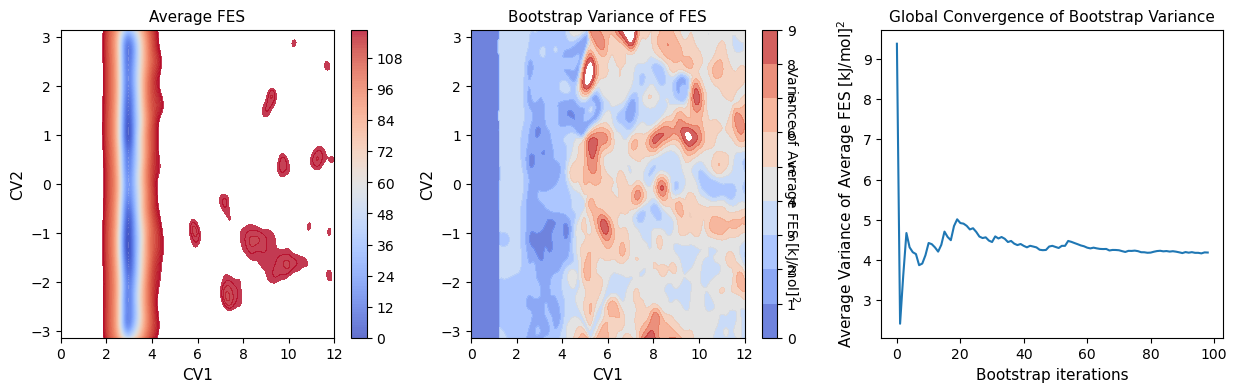

In [11]:
#from pyMFI import MFI

# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 120, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 120, ofe_lim = 10)

In [12]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_390K_xyl_xtb_patch)+'std_xyl390.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_390K_xyl_xtb_patch)+'fesavg_xyl390.json','w', encoding = 'utf-8'))

In [13]:
f = open('C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/XYL/390K/fesavg_xyl390.json','r')

Z_matrix_xyl_390 = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_390K_xyl_xtb_patch)+'std_xyl390.json','r')
variance = json.load(var)

Var_xyl_390 = np.array(variance).reshape(200,200)

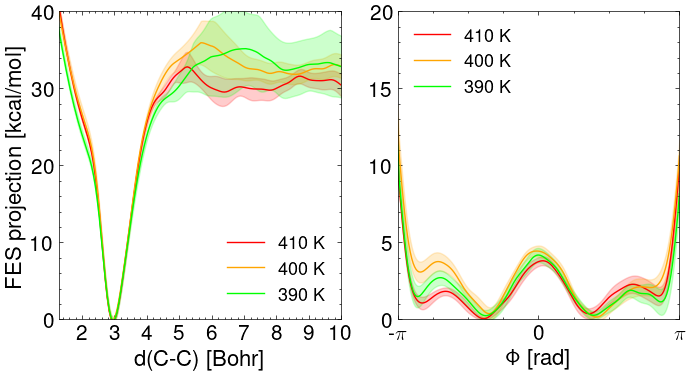

In [93]:
import sys
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\fserse\AppData\Local\Programs\MiKTeX\miktex\bin\x64'
import scienceplots
plt.style.use(['science','nature'])
#plt.rcParams.update({'font.size': 15})
#colors = plt.cm.hot_r(np.linspace(0.5,1,3))

X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

fig, ax = plt.subplots(1,2,figsize=(8, 4))
plt.axis([None, None, 0, None])
#zax = zoomed_inset_axes(ax, 2, loc=1)

ax = plt.subplot(1,2,1)
ax.plot(X,(Z_matrix_gas[65,:]-2)/4.18,color = "red" )
ax.fill_between(X, (Z_matrix_gas[65,:] - Var_gas[65,:]-2)/4.18, (Z_matrix_gas[65,:] + Var_gas[65,:]-2)/4.18, alpha=0.2, color = "red", label='_nolegend_')
ax.plot(X,(Z_matrix_gas_400[65,:]-2)/4.18,color = "orange" )
ax.fill_between(X, (Z_matrix_gas_400[65,:] - Var_gas_400[65,:]-2)/4.18, (Z_matrix_gas_400[65,:] + Var_gas_400[65,:]-2)/4.18, alpha=0.2, color = "orange", label='_nolegend_')
ax.plot(X,(Z_matrix_gas_390[60,:]-2)/4.18,color = "lime" )
ax.fill_between(X, (Z_matrix_gas_390[60,:] - Var_gas_390[60,:]-2)/4.18, (Z_matrix_gas_390[60,:] + Var_gas_390[60,:]-2)/4.18, alpha=0.2, color = "lime", label='_nolegend_')
ax.set_ylim([0,40])
ax.set_xlim([1.3,10])
ax.set_xlabel('d(C-C) [Bohr]', fontsize = 16)
ax.set_ylabel('FES projection [kcal/mol]',fontsize = 16)
ax.set_xticks([2,3,4,5,6,7,8,9,10],["2","3","4","5","6","7","8","9","10"] , fontsize=15)
ax.set_yticks([0,10,20,30,40], ["0", "10", "20", "30", "40"], fontsize=15)
ax.legend([ '410 K', "400 K", "390 K" ], fontsize = 13)

ax = plt.subplot(1,2,2)
ax.plot(Y,Z_matrix_gas[:,49]/4.18,color = "red" )
ax.fill_between(Y, (Z_matrix_gas[:,49] - Var_gas[:,49])/4.18, (Z_matrix_gas[:,49] + Var_gas[:,49])/4.18, alpha=0.2, color = "red", label='_nolegend_')
ax.plot(Y,Z_matrix_gas_400[:,49]/4.18,color = "orange" )
ax.fill_between(Y, (Z_matrix_gas_400[:,49] - Var_gas_400[:,49])/4.18, (Z_matrix_gas_400[:,49] + Var_gas_400[:,49])/4.18, alpha=0.2, color = "orange", label='_nolegend_')
ax.plot(Y,Z_matrix_gas_390[:,49]/4.18,color = "lime" )
ax.fill_between(Y, (Z_matrix_gas_390[:,49] - Var_gas_390[:,49])/4.18, (Z_matrix_gas_390[:,49] + Var_gas_390[:,49])/4.18, alpha=0.2, color = "lime", label='_nolegend_')
ax.set_ylim([0,20])
ax.set_xlim([-np.pi,np.pi])
ax.set_xlabel(' $ \Phi $ [rad]', fontsize = 16)
#ax.set_ylabel('FES projection [kcal/mol]',fontsize = 13)
ax.set_xticks([-np.pi,0,np.pi], ["-$ \pi $", "0", "$ \pi $"], fontsize=15)
ax.set_yticks([0,5,10,15,20], ["0", "5", "10", "15", "20"], fontsize=15)
ax.legend([ '410 K', "400 K", "390 K" ], fontsize = 13, loc= 'upper left')
plt.savefig("free_energy_profiles_ba_gasTemperatures.png", format="png", dpi=1200)

NameError: name 'Z_matrix_gas_390' is not defined

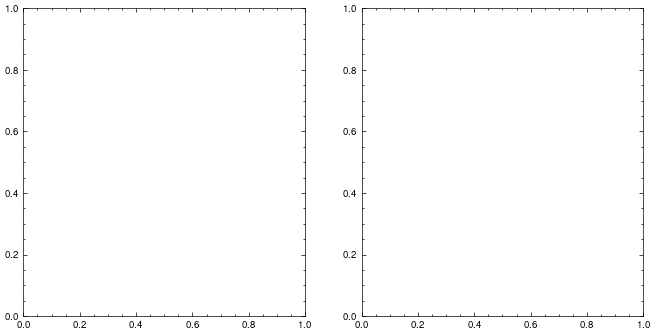

In [14]:
import sys
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\fserse\AppData\Local\Programs\MiKTeX\miktex\bin\x64'
import scienceplots
plt.style.use(['science','nature'])
#plt.rcParams.update({'font.size': 15})
#colors = plt.cm.hot_r(np.linspace(0.5,1,3))

X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

fig, ax = plt.subplots(1,2,figsize=(8, 4))
plt.axis([None, None, 0, None])
#zax = zoomed_inset_axes(ax, 2, loc=1)

ax = plt.subplot(1,2,1)
ax.plot(X,(Z_matrix_gas_390[65,:]-2)/4.18,color = "gray" )
ax.fill_between(X, (Z_matrix_gas_390[65,:] - Var_gas_390[65,:]-2)/4.18, (Z_matrix_gas_390[65,:] + Var_gas_390[65,:]-2)/4.18, alpha=0.2, color = "gray", label='_nolegend_')
ax.plot(X,(Z_matrix_xyl_390[65,:]-2)/4.18,color = "orange" )
ax.fill_between(X, (Z_matrix_xyl_390[65,:] - Var_xyl_390[65,:]-2)/4.18, (Z_matrix_xyl_390[65,:] + Var_xyl_390[65,:]-2)/4.18, alpha=0.2, color = "orange", label='_nolegend_')
#ax.plot(X,(Z_matrix_gas_390[60,:]-2)/4.18,color = "lime" )
#ax.fill_between(X, (Z_matrix_xyl_390[60,:] - Var_xyl_390[60,:]-2)/4.18, (Z_matrix_xyl_390[60,:] + Var_xyl_390[60,:]-2)/4.18, alpha=0.2, color = "lime", label='_nolegend_')
ax.set_ylim([0,40])
ax.set_xlim([1.3,10])
ax.set_xlabel('d(C-C) [Bohr]', fontsize = 16)
ax.set_ylabel('FES projection [kcal/mol]',fontsize = 16)
ax.set_xticks([2,3,4,5,6,7,8,9,10],["2","3","4","5","6","7","8","9","10"] , fontsize=15)
ax.set_yticks([0,10,20,30,40], ["0", "10", "20", "30", "40"], fontsize=15)
#ax.legend([ '410 K', "400 K", "390 K" ], fontsize = 13)

ax = plt.subplot(1,2,2)
ax.plot(Y,Z_matrix_gas_390[:,49]/4.18,color = "gray" )
ax.fill_between(Y, (Z_matrix_gas_390[:,49] - Var_gas_390[:,49])/4.18, (Z_matrix_gas_390[:,49] + Var_gas_390[:,49])/4.18, alpha=0.2, color = "gray", label='_nolegend_')
ax.plot(Y,Z_matrix_xyl_390[:,49]/4.18,color = "orange" )
ax.fill_between(Y, (Z_matrix_xyl_390[:,49] - Var_xyl_390[:,49])/4.18, (Z_matrix_xyl_390[:,49] + Var_xyl_390[:,49])/4.18, alpha=0.2, color = "orange", label='_nolegend_')
#ax.plot(Y,Z_matrix_gas_390[:,49]/4.18,color = "lime" )
#ax.fill_between(Y, (Z_matrix_gas_390[:,49] - Var_gas_390[:,49])/4.18, (Z_matrix_gas_390[:,49] + Var_gas_390[:,49])/4.18, alpha=0.2, color = "lime", label='_nolegend_')
ax.set_ylim([0,20])
ax.set_xlim([-np.pi,np.pi])
ax.set_xlabel(' $ \Phi $ [rad]', fontsize = 16)
#ax.set_ylabel('FES projection [kcal/mol]',fontsize = 13)
ax.set_xticks([-np.pi,0,np.pi], ["-$ \pi $", "0", "$ \pi $"], fontsize=15)
ax.set_yticks([0,5,10,15,20], ["0", "5", "10", "15", "20"], fontsize=15)
#ax.legend([ '4', "400 K", "390 K" ], fontsize = 13, loc= 'upper left')

## Backbiting

## 410 K

### GAS

In [14]:
from pyMFI import MFI

fes_410K_bckbt_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/BCKBT/410K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [7]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 12, 13, fes_410K_bckbt_xtb_patch)

In [8]:
for simulation in np.arange(1,14):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_410K_bckbt_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_410K_bckbt_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 3.4, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=50, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning: invalid value encountered in double_scalars
  ofe_history.append( sum(sum(ofe)) / (np.count_nonzero(ofe)))


|100/222|==> Average Mean Force Error: 14.676607818872839
|200/222|==> Average Mean Force Error: 16.622417376253537
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 15.452434778772773
|200/222|==> Average Mean Force Error: 17.044260776896227
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 14.502335058910413
|200/222|==> Average Mean Force Error: 15.55157191858674
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 16.76779730732435
|200/222|==> Average Mean Force Error: 18.40883863083492
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 16.74554839908204
|200/222|==> Average Mean Force Error: 19.42264774892098
I will in

20 FES st. dev. = 5.484
40 FES st. dev. = 5.005
60 FES st. dev. = 4.727
80 FES st. dev. = 4.882
100 FES st. dev. = 4.82


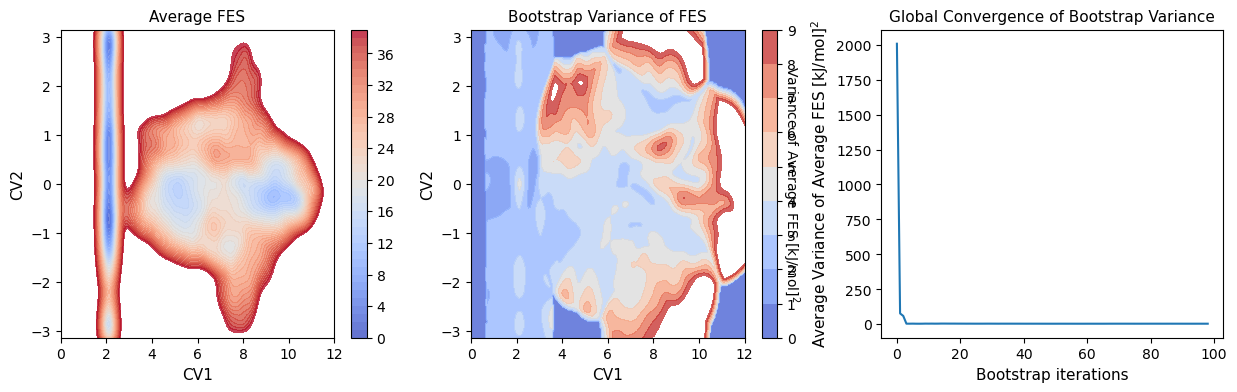

In [9]:
#from pyMFI import MFI

# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 40, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 40, ofe_lim = 10)
plt.savefig("free_energy_surf_bckbt_410K.png", format="png", dpi=1200)

In [10]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_410K_bckbt_xtb_patch)+'std_bckbt410.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_410K_bckbt_xtb_patch)+'fesavg_bckbt410.json','w', encoding = 'utf-8'))

In [15]:
f = open(str(fes_410K_bckbt_xtb_patch)+'fesavg_bckbt410.json','r')

Z_matrix_bckbt_410 = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_410K_bckbt_xtb_patch)+'std_bckbt410.json','r')
variance = json.load(var)

Var_bckbt_410 = np.array(variance).reshape(200,200)

## 310K

In [8]:
import os
import numpy as np
import json
os.chdir("C:/Users/fserse/Desktop/PhD_Thesis/MFI")
from pyMFI import MFI

fes_310K_bckbt_xtb_patch = 'C:/Users/fserse/Desktop/PhD_Thesis/MFI/nba/BCKBT/310K/'

forces_all = []
master = []
all_hills= []
error_history = []
Ftot_master = []
master_patch = [[np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200)), np.zeros((200,200))]]
FP = np.zeros((200,200))
ofe_history_patch = [0]
time_history_patch = [0]
X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

dx = np.abs( X[0] - X[1] )
dy = np.abs( Y[0] - Y[1] )

In [15]:
metadyn2hills(sigma_x,sigma_y,gamma,hartree_2_kj, 13, 14, fes_310K_bckbt_xtb_patch)

In [16]:
for simulation in np.arange(1,15):

    HILLS=MFI.load_HILLS_2D(hills_name=str(fes_310K_bckbt_xtb_patch)+"HILLS_"+str(simulation))
    #plt.plot(HILLS[:,1],HILLS[:,2],'.')
    #Read the Colvar File
    [position_x, position_y] = MFI.load_position_2D(position_name=str(fes_310K_bckbt_xtb_patch)+"position_"+str(simulation))
    #COMPUTE Mean force and weight of the simulation
    [X, Y, Ftot_den, Ftot_x, Ftot_y, ofv, ofe, cutoff, volume_history, ofe_history, time_history, Ftot_den2, ofv_num_x, ofv_num_y] = MFI.MFI_2D(HILLS = HILLS, position_x = position_x, position_y = position_y, bw = 0.2, kT = 2.57, min_grid = np.array((0, -np.pi)), max_grid = np.array((12, np.pi)), nbins = np.array((200,200)), log_pace = 100, error_pace = 100, base_terms=0, window_corners=[], WellTempered = 0, nhills=-1, periodic=0, FES_cutoff=80, FFT_integration=0)


    forces_all.append([X, Y, Ftot_den, Ftot_x, Ftot_y])

    master.append([Ftot_den, Ftot_den2, Ftot_x, Ftot_y, ofv_num_x, ofv_num_y])

    master_patch.append(MFI.patch_2D(master))
    
    ofe_history_patch += ofe_history
    time_history_adj = [element+time_history_patch[-1] for element in time_history]
    time_history_patch += time_history_adj

I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222


C:\Users\fserse\Desktop\PhD_Thesis\MFI\pyMFI\MFI.py:450: RuntimeWarning:

invalid value encountered in double_scalars



|100/222|==> Average Mean Force Error: 12.079276897595458
|200/222|==> Average Mean Force Error: 13.844079609209098
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 11.3654567430784
|200/222|==> Average Mean Force Error: 13.594582434681989
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 10.109033455087252
|200/222|==> Average Mean Force Error: 10.958496164724211
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 10.890530769376689
|200/222|==> Average Mean Force Error: 12.653410262229794
I will integrate the FES every  100  steps. This may take a while.
Total no. of Gaussians analysed: 222
|100/222|==> Average Mean Force Error: 10.746923967043656
|200/222|==> Average Mean Force Error: 11.045741446660061
I will

20 FES st. dev. = 4.723
40 FES st. dev. = 4.678
60 FES st. dev. = 4.752
80 FES st. dev. = 4.583
100 FES st. dev. = 4.574


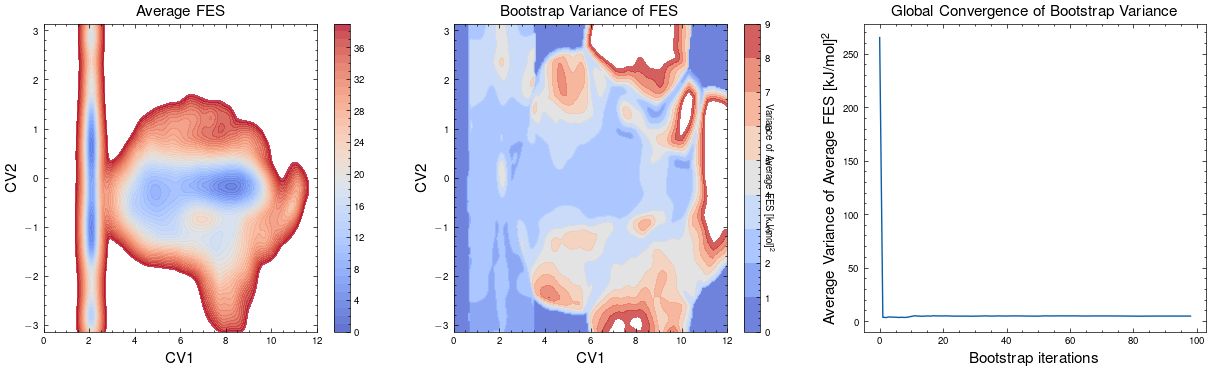

In [17]:
# Bootstrap
[FES_avr, cutoff, sd_fes, sd_fes_prog ] = MFI.bootstrap_2D_fes(X, Y, dx, dy, forces_all, 100, 40, 0, np.array((0, -np.pi)), np.array((12, np.pi)) )

# dx,dy are useless

MFI.plot_bootstrap(X, Y, FES_avr, sd_fes, sd_fes_prog, FES_lim = 40, ofe_lim = 10)
plt.savefig("free_energy_surf_bckbt_310K.png", format="png", dpi=1200)

In [18]:
import json
import codecs

stdtosave = sd_fes.tolist()
sdjson = json.dump(stdtosave, codecs.open(str(fes_310K_bckbt_xtb_patch)+'std_bckbt310.json','w', encoding = 'utf-8'))

fesavgtosave = FES_avr.tolist()
fes_avgjson = json.dump(fesavgtosave, codecs.open(str(fes_310K_bckbt_xtb_patch)+'fesavg_bckbt310.json','w', encoding = 'utf-8'))

In [9]:
f = open(str(fes_310K_bckbt_xtb_patch)+'fesavg_bckbt310.json','r')

Z_matrix_bckbt_310 = np.array(json.load(f)).reshape(200,200)

var = open(str(fes_310K_bckbt_xtb_patch)+'std_bckbt310.json','r')
variance = json.load(var)

Var_bckbt_310 = np.array(variance).reshape(200,200)

2.1105527638190953


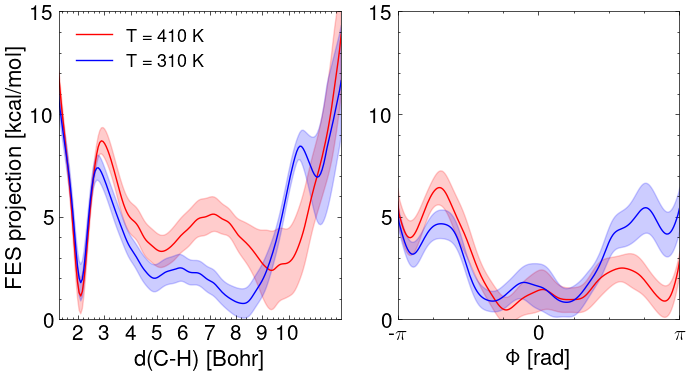

In [16]:
import sys
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\fserse\AppData\Local\Programs\MiKTeX\miktex\bin\x64'
import scienceplots
plt.style.use(['science','nature'])
#plt.rcParams.update({'font.size': 15})
#colors = plt.cm.hot_r(np.linspace(0.5,1,3))

X = np.linspace(0, 12, 200)
Y = np.linspace(-np.pi, np.pi, 200)

print(X[35])

fig, ax = plt.subplots(1,2,figsize=(8, 4))
plt.axis([None, None, 0, None])
#zax = zoomed_inset_axes(ax, 2, loc=1)

ax = plt.subplot(1,2,1)
ax.plot(X,Z_matrix_bckbt_410[91,:]/4.18,color = "red" )
ax.fill_between(X, (Z_matrix_bckbt_410[91,:] - Var_bckbt_410[91,:])/4.18, (Z_matrix_bckbt_410[91,:] + Var_bckbt_410[91,:])/4.18, alpha=0.2, color = "red", label='_nolegend_')
ax.plot(X,Z_matrix_bckbt_310[91,:]/4.18,color = "blue" )
ax.fill_between(X, (Z_matrix_bckbt_310[91,:] - Var_bckbt_310[91,:])/4.18, (Z_matrix_bckbt_310[91,:] + Var_bckbt_310[91,:])/4.18, alpha=0.2, color = "blue", label='_nolegend_')
ax.set_ylim([0,15])
ax.set_xlim([1.3,12])
ax.set_xlabel('d(C-H) [Bohr]', fontsize = 16)
ax.set_ylabel('FES projection [kcal/mol]',fontsize = 16)
ax.set_xticks([2,3,4,5,6,7,8,9,10],["2","3","4","5","6","7","8","9","10"] , fontsize=15)
ax.set_yticks([0,5,10,15], ["0", "5", "10","15"], fontsize=15)
ax.legend([ 'T = 410 K', "T = 310 K" ], fontsize = 13, loc= 'upper left')

ax = plt.subplot(1,2,2)
ax.plot(Y,Z_matrix_bckbt_410[:,35]/4.18,color = "red" )
ax.fill_between(Y, (Z_matrix_bckbt_410[:,35] - Var_bckbt_410[:,35])/4.18, (Z_matrix_bckbt_410[:,35] + Var_bckbt_410[:,35])/4.18, alpha=0.2, color = "red", label='_nolegend_')
ax.plot(Y,Z_matrix_bckbt_310[:,35]/4.18,color = "blue" )
ax.fill_between(Y, (Z_matrix_bckbt_310[:,35] - Var_bckbt_310[:,35])/4.18, (Z_matrix_bckbt_310[:,35] + Var_bckbt_310[:,35])/4.18, alpha=0.2, color = "blue", label='_nolegend_')
ax.set_ylim([0,15])
ax.set_xlim([-np.pi,np.pi])
ax.set_xlabel(' $ \Phi $ [rad]', fontsize = 16)
#ax.set_ylabel('FES projection [kcal/mol]',fontsize = 13)
ax.set_xticks([-np.pi,0,np.pi], ["-$ \pi $", "0", "$ \pi $"], fontsize=15)
ax.set_yticks([0,5,10, 15], ["0", "5", "10", "15"], fontsize=15)
#ax.legend([ 'vacuum', "nBA monomer" ], fontsize = 13)
plt.savefig("free_energy_profiles_ba_bckbt.png", format="png", dpi=1200)